# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv
# from tensorflow.keras.layers import 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [3]:
np.version.version

'1.19.5'

# Data normalization.

## Pandas to numpy

In [122]:
Coordinates_array = np.load('extracted_pdb_trajectory.npy')
Coordinates_array = Coordinates_array.astype(float)
Coordinates_array[:5]


array([[ 1.  , 36.94, 18.89, ..., 12.85, 33.87, 28.32],
       [ 2.  , 37.85, 19.26, ..., 12.46, 29.87, 29.89],
       [ 3.  , 36.41, 20.57, ..., 12.2 , 31.86, 29.85],
       [ 4.  , 38.92, 19.58, ..., 14.17, 33.45, 28.3 ],
       [ 5.  , 37.3 , 19.89, ..., 13.24, 32.89, 27.64]])

In [123]:
df_coo = pd.DataFrame(Coordinates_array)
df_coo_time = df_coo[0]

df_coo_only = df_coo.iloc[:,1:]
print(df_coo_time.head())
print(df_coo_only.head())


0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: 0, dtype: float64
     1      2      3      4      5      6      7      8      9      10   ...  \
0  36.94  18.89  22.61  36.54  19.60  22.01  37.79  19.17  23.07  37.15  ...   
1  37.85  19.26  23.75  37.79  19.95  23.00  38.43  19.60  24.50  38.23  ...   
2  36.41  20.57  21.10  35.96  20.64  20.20  36.99  21.39  21.24  37.08  ...   
3  38.92  19.58  23.01  39.34  20.09  22.25  38.81  20.32  23.70  39.59  ...   
4  37.30  19.89  24.43  37.90  20.66  24.18  36.63  20.27  25.09  37.94  ...   

     510    511    512    513    514    515    516    517    518    519  
0  27.25  12.55  32.67  28.49  12.41  32.12  29.63  12.85  33.87  28.32  
1  28.13  12.70  28.70  29.47  12.80  27.72  30.22  12.46  29.87  29.89  
2  31.67  12.52  30.73  30.42  13.32  30.69  31.38  12.20  31.86  29.85  
3  29.00  15.11  32.68  28.54  16.12  32.88  29.23  14.17  33.45  28.30  
4  29.30  13.76  32.09  28.46  14.10  32.55  29.58  13.24  32.89  27.64  

[5 ro

In [124]:
cleaned_coo = df_coo_only.to_numpy()
cleaned_coo[0].shape

(519,)

In [125]:
scaler = MinMaxScaler()

# Coordinates_array_scalled = scaler.fit_transform(Coordinates_array)
Coordinates_array_scalled = scaler.fit_transform(cleaned_coo)

Coordinates_array_scalled


array([[0.745102  , 0.38153908, 0.45649102, ..., 0.25970089, 0.68314834,
        0.57226602],
       [0.76348212, 0.38901232, 0.47950737, ..., 0.25181892, 0.6024218 ,
        0.60400243],
       [0.73439709, 0.41547162, 0.42600444, ..., 0.24656427, 0.64258325,
        0.60319385],
       ...,
       [0.12401535, 0.32862048, 0.70866142, ..., 0.05618432, 0.3493441 ,
        0.81443299],
       [0.15229247, 0.31872349, 0.71269937, ..., 0.09660469, 0.37315843,
        0.82029513],
       [0.14865684, 0.36356292, 0.72057339, ..., 0.09417947, 0.40262361,
        0.80068729]])

In [126]:
Coordinates_array_scalled_test = Coordinates_array_scalled[:5]
Coordinates_array_scalled_train = Coordinates_array_scalled[5:]
print(Coordinates_array_scalled_train.shape)
print(Coordinates_array_scalled_test.shape)


(4995, 519)
(5, 519)


In [127]:
Coordinates_array_scalled_test[0].shape

(519,)

# AutoEncoder

In [ ]:

encoder_input = keras.Input((520,), name='Alanine')
x1 = keras.layers.Dense(260, activation='relu',name='x1')(encoder_input)
x2 = keras.layers.Dense(130, activation='relu', name='x2')(x1)
x3 = keras.layers.Dense(65, activation='relu', name='x3')(x2)
# encoder_output = keras.layers.Dense(32, activation='relu', name='encoder_output')(x3)


encoder = keras.Model(encoder_input, x3, name='Encoder')


# decoder_layer1 = keras.layers.Dense(65,activation='relu',name='decoder_layer_1')(encoder_output)
d1 = keras.layers.Dense(130, activation='relu', name='d1')(x3)              #(decoder_layer1)
d2 = keras.layers.Dense(260, activation='relu', name='d2')(d1)              # (d1)
# d3 = keras.layers.Dense(98, activation='relu', name='d3')(d2)
decoder_output = keras.layers.Dense(520, activation='relu', name='decoder_output')(d2)

autoencoder = keras.Model(encoder_input,decoder_output)


In [ ]:
leakyRelu = keras.layers.LeakyReLU(alpha=0.3)

encoder_input_lr = keras.Input((520,), name='PolyAlanine_leaky_relu')
x1_lr = keras.layers.Dense(260, activation=leakyRelu,name='x1_lr')(encoder_input_lr)
x2_lr = keras.layers.Dense(130, activation=leakyRelu, name='x2_lr')(x1_lr)
x3_lr = keras.layers.Dense(65, activation=leakyRelu, name='x3_lr')(x2_lr)
encoder_output_lr = keras.layers.Dense(32, activation=leakyRelu, name='encoder_output_lr')(x3_lr)


encoder_lr = keras.Model(encoder_input_lr, encoder_output_lr, name='Encoder_lr')


decoder_layer1_lr = keras.layers.Dense(65,activation=leakyRelu,name='decoder_layer_1_lr')(encoder_output_lr)
d1_lr = keras.layers.Dense(130, activation=leakyRelu, name='d1_lr')(decoder_layer1_lr)
d2_lr = keras.layers.Dense(260, activation=leakyRelu, name='d2_lr')(d1_lr)              # (d1)
# d3 = keras.layers.Dense(98, activation='relu', name='d3')(d2)~=1.19.5

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder_lr.summary()

In [ ]:
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder.compile(optimizer=opt, loss='mse')
# autoencoder_lr.compile(optimizer=opt, loss='mse')


## Train AutoEncoder 

In [ ]:
autoencoder.fit(Coordinates_array_scalled_train,Coordinates_array_scalled_train,epochs=7,batch_size=20,validation_split=0.1)


In [ ]:
~=1.19.5

In [ ]:
example_encoded = encoder.predict(Coordinates_array_scalled_test[0].reshape((-1,520)))
example_AE = autoencoder.predict(Coordinates_array_scalled_test[0].reshape((-1,520)))
example_AE_lr = autoencoder_lr.predict(Coordinates_array_scalled_test[0].reshape((-1,520)))

In [ ]:
# example_encoded = scaler.inverse_transform(example_encoded)
example_AE = scaler.inverse_transform(example_AE)


In [ ]:
example_AE_lr = scaler.inverse_transform(example_AE_lr)


In [ ]:
example_AE_lr


In [ ]:
stop = 0
row_data = []
predicted_data = []
row_count = 0

for i in list(example_AE_lr[0])[1:]:
    # print(dat)
    # print(stop)

    row_data.append(i)
    if row_count == 2:
        predicted_data.append(row_data)
        row_data = []
        row_count = 0
        continue
    row_count += 1
    stop += 1
print(len(predicted_data))
print(predicted_data)

In [ ]:
stop = 0
row_data = []
actual_data = []
row_count = 0

for i in list(Coordinates_array[0])[1:]:
    # print(dat)
    # print(stop)
    row_data.append(i)
    if row_count == 2:
        actual_data.append(row_data)
        row_data = []
        row_count = 0
        continue
    row_count += 1
    
print(len(actual_data))
print(actual_data)


In [ ]:
len(list(Coordinates_array_scalled_test[0]))

In [ ]:
graph_predicted = pd.DataFrame(predicted_data, columns=['X', 'Y', 'Z'])

graph_actual = pd.DataFrame(actual_data, columns=['X', 'Y', 'Z'])
graph_actual.tail()


In [ ]:
graph_df = pd.DataFrame(full_data, columns=['X', 'Y', 'Z'])
graph_df.head()


## Checking how the Autoencoder preformed

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot3D(graph_actual['X'], graph_actual['Y'], graph_actual['Z'])
ax.plot3D(graph_predicted['X'], graph_predicted['Y'], graph_predicted['Z'])


In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(graph_actual['X'], graph_actual['Y'], graph_actual['Z'])
ax.scatter3D(graph_predicted['X'], graph_predicted['Y'], graph_predicted['Z'])


In [ ]:
print(graph_predicted.tail(10))

In [ ]:
print(graph_actual.tail(10))


In [ ]:
list(graph_predicted.iloc[172])


# Recreate the PDB file with updated Coordinates 

In [ ]:
PDB = 'example_pdb.pdb'



with open(PDB, newline='') as f:
    pdb_file = csv.reader(f, delimiter='\t')
    temp_list = []
# pdb_file[:6]
# print(len(pdb_file))
    row = []
    full_data = []
    counter = 0
    pdb_output = ''
    for line in pdb_file:

        
        if 'ATOM' not in line[0]:
            pdb_output += ''.join(line) + '\n'
        elif 'ATOM' in line[0]:
            line = line[0].split()
            predicted_coordinates = list(graph_predicted.iloc[counter])
            predicted_coordinates = [str(i) for i in predicted_coordinates]
            # line = [i for i in line if i != '']
            line = line[:6] + predicted_coordinates + line[10:]
            line = '\t'.join(line)
            print(line)
            pdb_output += line + '\n'
            print(counter)
            counter +=1


In [ ]:
with open('predicted_polyA.pdb','w') as f:
    f.write(pdb_output)

# Deep AutoEncoder

In [118]:
leakyRelu = keras.layers.LeakyReLU(alpha=0.3)

encoder_input_lr = keras.Input((519,), name='PolyAlanine_leaky_relu')
x1_lr = keras.layers.Dense(300, activation=leakyRelu, name='x1_lr',kernel_initializer='normal')(encoder_input_lr)
x2_lr = keras.layers.Dense(160, activation=leakyRelu, name='x2_lr',kernel_initializer='normal')(x1_lr)
x3_lr = keras.layers.Dense(65, activation=leakyRelu, name='x3_lr',kernel_initializer='normal')(x2_lr)
x4_lr = keras.layers.Dense(32, activation=leakyRelu, name='x4_lr',kernel_initializer='normal')(x3_lr)
x5_lr = keras.layers.Dense(8, activation=leakyRelu, name='x5_lr',kernel_initializer='normal')(x4_lr)
encoder_output_lr = keras.layers.Dense(2, activation=leakyRelu, name='encoder_output_lr',kernel_initializer='normal')(x5_lr)


encoder_lr = keras.Model(encoder_input_lr, encoder_output_lr, name='Encoder_lr')


decoder_layer1_lr = keras.layers.Dense(8,activation=leakyRelu,name='decoder_layer_1_lr',kernel_initializer='normal')(encoder_output_lr)
d1_lr = keras.layers.Dense(32, activation=leakyRelu, name='d1_lr',kernel_initializer='normal')(decoder_layer1_lr)             
d2_lr = keras.layers.Dense(65, activation=leakyRelu, name='d2_lr',kernel_initializer='normal')(d1_lr)              
d3_lr = keras.layers.Dense(160, activation=leakyRelu, name='d3_lr',kernel_initializer='normal')(d2_lr)              
d4_lr = keras.layers.Dense(300, activation=leakyRelu, name='d4_lr',kernel_initializer='normal')(d3_lr) 

decoder_output_lr = keras.layers.Dense(519, activation=leakyRelu, name='decoder_output_lr',kernel_initializer='normal')(d4_lr)
autoencoder_lr = keras.Model(encoder_input_lr, decoder_output_lr)


# Build decoder 6 layers
encode_input = keras.Input((2,), name='Encded_input')

decco = autoencoder_lr.layers[-6](encode_input)
decco = autoencoder_lr.layers[-5](decco)
decco = autoencoder_lr.layers[-4](decco)
decco = autoencoder_lr.layers[-3](decco)
decco = autoencoder_lr.layers[-2](decco)
decco = autoencoder_lr.layers[-1](decco)



decoder_lr = keras.Model(encode_input, decco, name='Decoder_lr')


In [119]:
autoencoder_lr.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
PolyAlanine_leaky_relu (Inpu [(None, 519)]             0         
_________________________________________________________________
x1_lr (Dense)                (None, 300)               156000    
_________________________________________________________________
x2_lr (Dense)                (None, 160)               48160     
_________________________________________________________________
x3_lr (Dense)                (None, 65)                10465     
_________________________________________________________________
x4_lr (Dense)                (None, 32)                2112      
_________________________________________________________________
x5_lr (Dense)                (None, 8)                 264       
_________________________________________________________________
encoder_output_lr (Dense)    (None, 2)                 18  

In [120]:
decoder_lr.summary()

Model: "Decoder_lr"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encded_input (InputLayer)    [(None, 2)]               0         
_________________________________________________________________
decoder_layer_1_lr (Dense)   (None, 8)                 24        
_________________________________________________________________
d1_lr (Dense)                (None, 32)                288       
_________________________________________________________________
d2_lr (Dense)                (None, 65)                2145      
_________________________________________________________________
d3_lr (Dense)                (None, 160)               10560     
_________________________________________________________________
d4_lr (Dense)                (None, 300)               48300     
_________________________________________________________________
decoder_output_lr (Dense)    (None, 519)               1

In [128]:
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)


checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='max',
    save_best_only=True)


autoencoder_lr.compile(optimizer=opt, loss='mse',metrics='mse')
autoencoder_lr.fit(Coordinates_array_scalled, Coordinates_array_scalled,
                        callbacks=[model_checkpoint_callback],
                        epochs=100, batch_size=5, validation_split=0.2)


Epoch 1/100
800/800 [==============================] - 7s 7ms/step - loss: 0.0988 - mse: 0.0988 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 2/100
800/800 [==============================] - 6s 7ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0823 - val_mse: 0.0823
Epoch 3/100
800/800 [==============================] - 6s 8ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 4/100
800/800 [==============================] - 6s 7ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 5/100
800/800 [==============================] - 6s 7ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 6/100
800/800 [==============================] - 6s 7ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 7/100
800/800 [==============================] - 5s 7ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 8/100
800/800 [==============================] - 5s 7ms/step - 

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder_lr,to_file='AutoEncoderlr.png')

In [9]:
model = autoencoder_lr.load_weights(checkpoint_filepath)

NameError: name 'autoencoder_lr' is not defined

In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(autoencoder_lr).create(prog='dot', format='svg'))


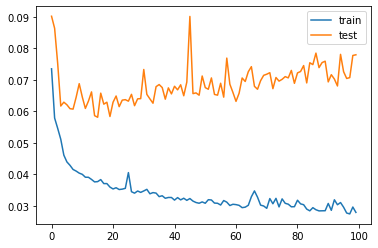

In [56]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


In [50]:
encoded_xyz = []
for i in range(Coordinates_array_scalled.shape[0]):
    encoded_coordinate = list(encoder_lr.predict(Coordinates_array_scalled[i].reshape((-1, 519)))[0])
    encoded_xyz.append(encoded_coordinate)
    

encoded_xyz[0]



[9.129487, -2.8409936]

In [53]:
encoded_xyz[0]

[9.129487, -2.8409936]

In [57]:
encoded_xyz_array = np.array(encoded_xyz)
encoded_xyz_array.shape


(5000, 2)

In [60]:
np.save('encoded_xyz_array.npy',encoded_xyz_array)

In [4]:
encoded_xyz_array = np.load('encoded_xyz_array.npy')
encoded_xyz_array.shape

(5000, 2)

In [5]:
encoded_xyz_df = pd.DataFrame(encoded_xyz_array)
encoded_xyz_df.head()


,0,1
0,9.129487,-2.840994
1,9.310599,-2.897259
2,8.743897,-2.721105
3,9.570127,-2.977942
4,9.475515,-2.948548


In [6]:
temp_df = encoded_xyz_df.iloc[1:]
temp_df.rename(columns={0: "y1", 1: "y2"},inplace=True)

/home/ayub/.local/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
temp_df.head()

,y1,y2
1,9.310599,-2.897259
2,8.743897,-2.721105
3,9.570127,-2.977942
4,9.475515,-2.948548
5,9.345530,-2.908145


In [8]:
encoded_xyz_df

,0,1
0,9.129487,-2.840994
1,9.310599,-2.897259
2,8.743897,-2.721105
3,9.570127,-2.977942
4,9.475515,-2.948548
...,...,...
4995,9.473530,-2.947952
4996,9.568713,-2.977467
4997,9.332465,-2.903993
4998,9.225574,-2.870726


In [9]:
temp_df = temp_df.append({'y1':None,'y2':None},ignore_index=True)
temp_df.tail()

,y1,y2
4995,9.568713,-2.977467
4996,9.332465,-2.903993
4997,9.225574,-2.870726
4998,9.617414,-2.992614
4999,NaN,NaN


In [10]:
print(f'shape of features:{encoded_xyz_df.shape} \nshape of targets:{temp_df.shape}')

shape of features:(5000, 2) 
shape of targets:(5000, 2)


In [11]:
labelled_encoded_xyz = pd.concat([encoded_xyz_df,temp_df],axis=1)
labelled_encoded_xyz.head()

,0,1,y1,y2
0,9.129487,-2.840994,9.310599,-2.897259
1,9.310599,-2.897259,8.743897,-2.721105
2,8.743897,-2.721105,9.570127,-2.977942
3,9.570127,-2.977942,9.475515,-2.948548
4,9.475515,-2.948548,9.345530,-2.908145


In [12]:
labelled_encoded_xyz.dropna(inplace=True)
labelled_encoded_xyz.tail()

,0,1,y1,y2
4994,8.449734,-2.629412,9.473530,-2.947952
4995,9.473530,-2.947952,9.568713,-2.977467
4996,9.568713,-2.977467,9.332465,-2.903993
4997,9.332465,-2.903993,9.225574,-2.870726
4998,9.225574,-2.870726,9.617414,-2.992614


In [14]:
labelled_encoded_xyz.shape

(4999, 4)

In [15]:
features = labelled_encoded_xyz[[0,1]]
features

,0,1
0,9.129487,-2.840994
1,9.310599,-2.897259
2,8.743897,-2.721105
3,9.570127,-2.977942
4,9.475515,-2.948548
...,...,...
4994,8.449734,-2.629412
4995,9.473530,-2.947952
4996,9.568713,-2.977467
4997,9.332465,-2.903993


In [16]:
targets = labelled_encoded_xyz[['y1','y2']]
targets

,y1,y2
0,9.310599,-2.897259
1,8.743897,-2.721105
2,9.570127,-2.977942
3,9.475515,-2.948548
4,9.345530,-2.908145
...,...,...
4994,9.473530,-2.947952
4995,9.568713,-2.977467
4996,9.332465,-2.903993
4997,9.225574,-2.870726


In [17]:
features_arr = features.to_numpy()
targets_arr = targets.to_numpy()
features_arr.shape

(4999, 2)

# Train RNN model to predict feature MD simulations

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization

In [19]:
features_arr_reshaped = features_arr.reshape(4999, 1, 2)
features_arr_reshaped.shape[1:]


(1, 2)

In [21]:
model_RNN = Sequential()
model_RNN.add(LSTM(128,input_shape = (features_arr_reshaped.shape[1:]), return_sequences=True, activation='relu'))
model_RNN.add(Dropout(0.2))
model_RNN.add(BatchNormalization())

model_RNN.add(LSTM(128,input_shape = (features_arr_reshaped.shape[1:]), return_sequences=True, activation='relu'))
model_RNN.add(Dropout(0.2))
model_RNN.add(BatchNormalization())

model_RNN.add(LSTM(128, input_shape=(features_arr_reshaped.shape[1:]), activation='relu'))
model_RNN.add(Dropout(0.2))
model_RNN.add(BatchNormalization())

model_RNN.add(Dense(32, activation='relu'))
model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(2, activation='relu'))






In [24]:
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 128)            67072     
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 128)            512       
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)              

In [37]:
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

model_RNN.compile(optimizer=opt, loss='mse', metrics='accuracy')


In [35]:
test_features_arr_reshaped = features_arr_reshaped[3999:]
train_features_arr_reshaped = features_arr_reshaped[:3999]


train_targets_arr = targets_arr[:3999]
test_targets_arr = targets_arr[3999:]



In [39]:
history = model_RNN.fit(
        train_features_arr_reshaped,train_targets_arr,
        batch_size=8,
        epochs=100,
        validation_data=(test_features_arr_reshaped,test_targets_arr)
)

Epoch 1/100
500/500 [==============================] - 9s 8ms/step - loss: 26.4778 - accuracy: 0.8163 - val_loss: 6.5678 - val_accuracy: 0.9620
Epoch 2/100
500/500 [==============================] - 4s 7ms/step - loss: 10.6813 - accuracy: 0.9035 - val_loss: 4.9271 - val_accuracy: 0.9620
Epoch 3/100
500/500 [==============================] - 4s 7ms/step - loss: 9.7506 - accuracy: 0.9117 - val_loss: 4.9138 - val_accuracy: 0.9620
Epoch 4/100
500/500 [==============================] - 4s 7ms/step - loss: 8.7295 - accuracy: 0.9152 - val_loss: 5.1123 - val_accuracy: 0.9620
Epoch 5/100
500/500 [==============================] - 4s 7ms/step - loss: 8.8642 - accuracy: 0.9111 - val_loss: 5.3485 - val_accuracy: 0.9620
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 8.5349 - accuracy: 0.9040 - val_loss: 5.5810 - val_accuracy: 0.9620
Epoch 7/100
500/500 [==============================] - 4s 8ms/step - loss: 8.5915 - accuracy: 0.9036 - val_loss: 4.6804 - val_accuracy: 0.96

In [34]:
targets_arr[:3999].shape

(1000, 2)

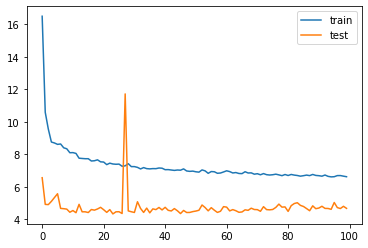

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


In [59]:
model_RNN.predict(train_features_arr_reshaped[22].reshape(1, 1, 2))


array([[12.023633,  0.      ]], dtype=float32)

In [60]:
train_features_arr_reshaped[23]

array([[11.849548 , -3.6866357]], dtype=float32)

In [82]:
model_RNN_2 = Sequential()
model_RNN_2.add(LSTM(128,input_shape = (features_arr_reshaped.shape[1:]), return_sequences=True, activation='relu'))
model_RNN_2.add(Dropout(0.2))
# model_RNN.add(BatchNormalization())

model_RNN_2.add(LSTM(128,input_shape = (features_arr_reshaped.shape[1:]), return_sequences=True, activation='relu'))
model_RNN_2.add(Dropout(0.2))
# model_RNN.add(BatchNormalization())

model_RNN_2.add(LSTM(128, input_shape=(features_arr_reshaped.shape[1:]), activation='relu'))
model_RNN_2.add(Dropout(0.2))
# model_RNN.add(BatchNormalization())

model_RNN_2.add(Dense(32, activation='relu'))
model_RNN_2.add(Dropout(0.2))

model_RNN_2.add(Dense(2, activation='tanh'))


In [83]:
model_RNN_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 128)            67072     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 128)            131584    
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [68]:
scaler_2 = MinMaxScaler()
features_arr_scalled = scaler_2.fit_transform(features_arr)
features_arr_scalled

array([[0.45808813, 0.49996203],
       [0.46695212, 0.49179205],
       [0.4392166 , 0.51737034],
       ...,
       [0.47958472, 0.48014548],
       [0.4680223 , 0.49081418],
       [0.46279085, 0.49564478]], dtype=float32)

In [69]:

targets_arr_scalled = scaler_2.fit_transform(targets_arr)
targets_arr_scalled


array([[0.46695212, 0.49179205],
       [0.4392166 , 0.51737034],
       [0.4796539 , 0.48007658],
       ...,
       [0.4680223 , 0.49081418],
       [0.46279085, 0.49564478],
       [0.48196825, 0.4779461 ]], dtype=float32)

In [71]:
features_arr_scalled_reshaped = features_arr_scalled.reshape(4999, 1, 2)
features_arr_scalled_reshaped.shape

(4999, 1, 2)

In [80]:
test_features_arr_scalled_reshaped = features_arr_scalled_reshaped[3999:]
train_features_arr_scalled_reshaped = features_arr_scalled_reshaped[:3999]


train_targets_arr_scalled = targets_arr_scalled[:3999]
test_targets_arr_scalled = targets_arr_scalled[3999:]
train_features_arr_scalled_reshaped.shape

(3999, 1, 2)

In [84]:
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)
model_RNN_2.compile(optimizer=opt, loss='mse', metrics='accuracy')

model_RNN_2.fit(
    train_features_arr_scalled_reshaped, train_targets_arr_scalled,
    batch_size=8,
    epochs=10,
    validation_data=(test_features_arr_scalled_reshaped, test_targets_arr_scalled)
)


Epoch 1/10
500/500 [==============================] - 10s 11ms/step - loss: 0.0817 - accuracy: 0.6508 - val_loss: 0.0015 - val_accuracy: 0.9310
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 0.0075 - accuracy: 0.9210 - val_loss: 0.0019 - val_accuracy: 0.9380
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0055 - accuracy: 0.9364 - val_loss: 0.0013 - val_accuracy: 0.9430
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0046 - accuracy: 0.9407 - val_loss: 0.0013 - val_accuracy: 0.9580
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0038 - accuracy: 0.9451 - val_loss: 0.0015 - val_accuracy: 0.9260
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0035 - accuracy: 0.9492 - val_loss: 0.0014 - val_accuracy: 0.9460
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0032 - accuracy: 0.9435 - val_loss: 0.0012 - val_accuracy: 0.9580
Epoc

In [108]:
ex = model_RNN_2.predict(test_features_arr_scalled_reshaped[100].reshape(1, 1, 2))


In [107]:
test_targets_arr_scalled[100]

array([0.708779, 0.268696], dtype=float32)

In [222]:
# ex
test_targets_arr_scalled[100].shape
ex.shape


(1, 2)

In [135]:
ex_encoded = scaler_2.inverse_transform(ex)[0]
ex_encoded


array([14.192404 , -4.5163193], dtype=float32)

In [223]:
ref_encode = scaler_2.inverse_transform(test_targets_arr_scalled[100].reshape(1,2))[0]
ref_encode

array([14.251692, -4.433687], dtype=float32)

In [215]:
prediction_str = decoder_lr.predict(ex_encoded.reshape(-1,2))

In [226]:
ref_str = decoder_lr.predict(ref_encode.reshape(-1,2))

In [216]:
example_str = scaler.inverse_transform(prediction_str)
example_str[:2]

array([[15.267151 , 27.842947 , 11.522764 , 15.389928 , 28.177967 ,
        11.3359585, 15.715762 , 27.642715 , 11.316745 , 14.729624 ,
        27.132113 , 12.005965 , 14.673302 , 28.533709 , 12.47859  ,
        13.460607 , 27.571175 , 12.23678  , 15.43778  , 26.310925 ,
        14.481485 , 15.519317 , 26.929625 , 15.22007  , 15.22412  ,
        25.743021 , 15.079491 , 15.626898 , 25.363335 , 15.254899 ,
        15.129934 , 27.533737 , 12.379402 , 16.745893 , 27.63198  ,
        11.313536 , 14.746331 , 26.826244 , 11.299416 , 13.5721655,
        26.441557 , 12.591184 , 14.890903 , 26.446308 ,  9.8024   ,
        15.109693 , 27.159378 , 10.709201 , 13.453961 , 28.36124  ,
        10.526259 , 12.586096 , 29.634796 , 10.712047 , 12.679195 ,
        28.652029 , 11.064296 , 13.031929 , 28.671349 , 10.307634 ,
        15.970868 , 26.014507 , 13.069609 , 15.246571 , 24.409197 ,
        12.849051 , 16.387058 , 27.885305 , 15.240382 , 15.496236 ,
        28.153992 , 14.027377 , 16.432558 , 28.6

In [227]:
ref_str = scaler.inverse_transform(ref_str)
ref_str[0]


array([15.652829 , 27.340548 , 11.873145 , 15.76709  , 27.619707 ,
       11.688905 , 16.16653  , 26.954266 , 11.675816 , 15.100935 ,
       26.413712 , 12.389911 , 14.999104 , 28.150894 , 12.773823 ,
       13.843614 , 27.158216 , 12.607333 , 15.742098 , 25.84985  ,
       14.790377 , 15.852038 , 26.408937 , 15.674476 , 15.524383 ,
       25.227734 , 15.432287 , 16.008966 , 24.797268 , 15.586333 ,
       15.289619 , 27.11459  , 12.581851 , 16.863426 , 27.190382 ,
       11.454717 , 14.9116745, 26.594852 , 11.473743 , 13.759824 ,
       26.13964  , 12.703546 , 14.891165 , 26.168991 ,  9.819021 ,
       15.0801   , 26.992855 , 10.677311 , 13.335392 , 28.133825 ,
       10.527484 , 12.572941 , 29.375177 , 10.70689  , 12.59451  ,
       28.444965 , 11.045417 , 12.946164 , 28.37522  , 10.272015 ,
       15.746598 , 25.615053 , 12.923789 , 14.982015 , 23.847986 ,
       12.667581 , 16.074026 , 27.754484 , 15.376696 , 15.261437 ,
       27.972408 , 14.31692  , 16.033522 , 28.03772  , 15.8688

In [182]:
# example_str.shape

Coordinates_array[4100][1:]



array([17.43, 21.8 , 35.94, 17.1 , 22.75, 35.88, 17.46, 21.6 , 36.93,
       18.35, 21.69, 35.54, 16.52, 20.86, 35.28, 16.6 , 21.01, 34.21,
       16.91, 19.32, 35.62, 16.5 , 19.  , 36.58, 16.31, 18.75, 34.92,
       17.95, 19.02, 35.47, 15.15, 21.2 , 35.88, 14.99, 22.05, 36.77,
       14.11, 20.58, 35.39, 14.24, 19.89, 34.66, 12.78, 20.54, 35.96,
       12.73, 21.17, 36.85, 11.77, 20.94, 34.89, 11.68, 20.22, 34.08,
       10.86, 21.19, 35.44, 12.12, 21.85, 34.42, 12.31, 19.13, 36.45,
       12.41, 18.21, 35.6 , 11.84, 19.04, 37.68, 11.79, 19.89, 38.22,
       11.22, 17.83, 38.23, 11.74, 16.92, 37.93, 11.18, 17.86, 39.78,
       10.6 , 18.71, 40.13, 10.72, 16.98, 40.22, 12.18, 17.91, 40.21,
        9.81, 17.63, 37.81,  9.17, 18.63, 37.54,  9.37, 16.33, 37.69,
       10.16, 15.71, 37.79,  8.03, 15.93, 37.33,  7.78, 16.29, 36.33,
        8.2 , 14.45, 37.2 ,  7.22, 14.04, 36.94,  8.88, 14.19, 36.39,
        8.42, 14.  , 38.17,  7.09, 16.29, 38.53,  7.44, 16.18, 39.71,
        5.82, 16.68,

In [236]:
stop = 0 #df_all = pd.concat
row_data = []
ref_data = []
row_count = 0

for i in list(ref_str[0]):
    # print(dat)
    # print(stop)

    row_data.append(i)
    if row_count == 2:
        ref_data.append(row_data)
        row_data = []
        row_count = 0
        continue
    row_count += 1
    stop += 1

graph_ref = pd.DataFrame(ref_data, columns=['X', 'Y', 'Z'])
print(graph_ref.shape)
print(len(ref_data))
print(ref_data)


(173, 3)
173
[[15.652829, 27.340548, 11.873145], [15.76709, 27.619707, 11.688905], [16.16653, 26.954266, 11.675816], [15.100935, 26.413712, 12.389911], [14.999104, 28.150894, 12.773823], [13.843614, 27.158216, 12.607333], [15.742098, 25.84985, 14.790377], [15.852038, 26.408937, 15.674476], [15.524383, 25.227734, 15.432287], [16.008966, 24.797268, 15.586333], [15.289619, 27.11459, 12.581851], [16.863426, 27.190382, 11.454717], [14.9116745, 26.594852, 11.473743], [13.759824, 26.13964, 12.703546], [14.891165, 26.168991, 9.819021], [15.0801, 26.992855, 10.677311], [13.335392, 28.133825, 10.527484], [12.572941, 29.375177, 10.70689], [12.59451, 28.444965, 11.045417], [12.946164, 28.37522, 10.272015], [15.746598, 25.615053, 12.923789], [14.982015, 23.847986, 12.667581], [16.074026, 27.754484, 15.376696], [15.261437, 27.972408, 14.31692], [16.033522, 28.03772, 15.868866], [16.514023, 24.388721, 14.23015], [16.360958, 27.036755, 17.509613], [16.36406, 26.035799, 15.989206], [16.331226, 28.67703

In [237]:
stop = 0
row_data = []
predicted_data = []
row_count = 0

for i in list(example_str[0]):
    # print(dat)
    # print(stop)

    row_data.append(i)
    if row_count == 2:
        predicted_data.append(row_data)
        row_data = []
        row_count = 0
        continue
    row_count += 1
    stop += 1

graph_predicted = pd.DataFrame(predicted_data, columns=['X', 'Y', 'Z'])
print(graph_predicted.shape)
print(len(predicted_data))
print(predicted_data)


(173, 3)
173
[[15.267151, 27.842947, 11.522764], [15.389928, 28.177967, 11.3359585], [15.715762, 27.642715, 11.316745], [14.729624, 27.132113, 12.005965], [14.673302, 28.533709, 12.47859], [13.460607, 27.571175, 12.23678], [15.43778, 26.310925, 14.481485], [15.519317, 26.929625, 15.22007], [15.22412, 25.743021, 15.079491], [15.626898, 25.363335, 15.254899], [15.129934, 27.533737, 12.379402], [16.745893, 27.63198, 11.313536], [14.746331, 26.826244, 11.299416], [13.5721655, 26.441557, 12.591184], [14.890903, 26.446308, 9.8024], [15.109693, 27.159378, 10.709201], [13.453961, 28.36124, 10.526259], [12.586096, 29.634796, 10.712047], [12.679195, 28.652029, 11.064296], [13.031929, 28.671349, 10.307634], [15.970868, 26.014507, 13.069609], [15.246571, 24.409197, 12.849051], [16.387058, 27.885305, 15.240382], [15.496236, 28.153992, 14.027377], [16.432558, 28.653128, 15.757422], [16.923729, 25.187128, 14.427341], [16.624674, 27.845749, 17.052126], [16.693283, 26.838358, 15.679089], [16.573898, 29

In [240]:
print(graph_predicted.head())
print(graph_ref.head())


           X          Y          Z
0  15.267151  27.842947  11.522764
1  15.389928  28.177967  11.335958
2  15.715762  27.642715  11.316745
3  14.729624  27.132113  12.005965
4  14.673302  28.533709  12.478590
           X          Y          Z
0  15.652829  27.340548  11.873145
1  15.767090  27.619707  11.688905
2  16.166531  26.954266  11.675816
3  15.100935  26.413712  12.389911
4  14.999104  28.150894  12.773823


In [184]:
PDB = 'example_pdb.pdb'



with open(PDB, newline='') as f:
    pdb_file = csv.reader(f, delimiter='\t')
    temp_list = []
# pdb_file[:6]
# print(len(pdb_file))
    row = []
    full_data = []
    counter = 0
    pdb_output = ''
    for line in pdb_file:

        
        if 'ATOM' not in line[0]:
            pdb_output += ''.join(line) + '\n'
        elif 'ATOM' in line[0]:
            line = line[0].split()
            predicted_coordinates = list(graph_predicted.iloc[counter])
            predicted_coordinates = [str(i) for i in predicted_coordinates]
            # line = [i for i in line if i != '']
            line = line[:6] + predicted_coordinates + line[10:]
            line = '\t'.join(line)
            pdb_output += line + '\n'
            print(line)
            print(counter)
            counter +=1



ATOM	1	N	ALA	X	41	17.43	21.8	35.94	0.00	SYST
0
ATOM	2	H1	ALA	X	41	17.1	22.75	35.88	0.00	SYST
1
ATOM	3	H2	ALA	X	41	17.46	21.6	36.93	0.00	SYST
2
ATOM	4	H3	ALA	X	41	18.35	21.69	35.54	0.00	SYST
3
ATOM	5	CA	ALA	X	41	16.52	20.86	35.28	0.00	SYST
4
ATOM	6	HA	ALA	X	41	16.6	21.01	34.21	0.00	SYST
5
ATOM	7	CB	ALA	X	41	16.91	19.32	35.62	0.00	SYST
6
ATOM	8	HB1	ALA	X	41	16.5	19.0	36.58	0.00	SYST
7
ATOM	9	HB2	ALA	X	41	16.31	18.75	34.92	0.00	SYST
8
ATOM	10	HB3	ALA	X	41	17.95	19.02	35.47	0.00	SYST
9
ATOM	11	C	ALA	X	41	15.15	21.2	35.88	0.00	SYST
10
ATOM	12	O	ALA	X	41	14.99	22.05	36.77	0.00	SYST
11
ATOM	13	N	ALA	X	42	14.11	20.58	35.39	0.00	SYST
12
ATOM	14	H	ALA	X	42	14.24	19.89	34.66	0.00	SYST
13
ATOM	15	CA	ALA	X	42	12.78	20.54	35.96	0.00	SYST
14
ATOM	16	HA	ALA	X	42	12.73	21.17	36.85	0.00	SYST
15
ATOM	17	CB	ALA	X	42	11.77	20.94	34.89	0.00	SYST
16
ATOM	18	HB1	ALA	X	42	11.68	20.22	34.08	0.00	SYST
17
ATOM	19	HB2	ALA	X	42	10.86	21.19	35.44	0.00	SYST
18
ATOM	20	HB3	ALA	X	42	12.12	21.85	34.42	0.00	SYST
19
ATOM	

In [154]:
graph_predicted.shape

(172, 3)

In [185]:
with open('predicted_polyA_3.pdb', 'w') as f:
    f.write(pdb_output)


In [210]:
graph_predicted.shape[0]

173

In [211]:
def RMSD(df_predict, df_ref):
    predict_arr = df_predict.to_numpy()
    ref_arr = df_ref.to_numpy()
    n = df_ref.shape[0]  # df_ref.shape[0] * df_ref.shape[1]
    return np.sqrt(np.sum((np.array(predict_arr)-np.array(ref_arr))**2))/n
    


In [200]:
a = np.matrix([[1, 2,3], [3, 4,2]])
b = np.matrix([[5, 6,6], [7, 8,9]])
sum((np.array(a)-np.array(b))**2)/

array([32, 32, 58])

In [207]:
RMSD(a,b)

1.8408935028645435

In [203]:
a.shape[0] * a.shape[1]

6

In [241]:
RMSD(graph_predicted,graph_ref)

0.07482573425339499